# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Create Plots to Showcase the Relationship Between Weather Variables and Latitude


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | okhotsk
Processing Record 2 of Set 1 | ibra
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | tobol
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | hamilton
Processing Record 7 of Set 1 | deep river
Processing Record 8 of Set 1 | sechura
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | goshogawara
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | laguna
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | baculin
Processing Record 18 of Set 1 | jalna
Processing Record 19 of Set 1 | mahajanga
Processing Record 20 of Set 1 | edd
Processing Record 21 of Set 1 | lamas
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 1 | port macquarie
Processing Record 2

Processing Record 40 of Set 4 | inta
Processing Record 41 of Set 4 | klaksvik
Processing Record 42 of Set 4 | sabha
Processing Record 43 of Set 4 | alta floresta
Processing Record 44 of Set 4 | ukiah
Processing Record 45 of Set 4 | mangrol
Processing Record 46 of Set 4 | chagda
City not found. Skipping...
Processing Record 47 of Set 4 | saldanha
Processing Record 48 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 49 of Set 4 | pimenta bueno
Processing Record 0 of Set 5 | iguape
Processing Record 1 of Set 5 | namatanai
Processing Record 2 of Set 5 | amderma
City not found. Skipping...
Processing Record 3 of Set 5 | yarkovo
Processing Record 4 of Set 5 | bredasdorp
Processing Record 5 of Set 5 | hualmay
Processing Record 6 of Set 5 | nuuk
Processing Record 7 of Set 5 | hirara
Processing Record 8 of Set 5 | mitsamiouli
Processing Record 9 of Set 5 | half moon bay
Processing Record 10 of Set 5 | vostok
Processing Record 11 of Set 5 | port lincoln
Processing Record 12 o

Processing Record 30 of Set 8 | warmbad
Processing Record 31 of Set 8 | bejar
Processing Record 32 of Set 8 | lahaina
Processing Record 33 of Set 8 | kendari
Processing Record 34 of Set 8 | homer
Processing Record 35 of Set 8 | urumqi
Processing Record 36 of Set 8 | springdale
Processing Record 37 of Set 8 | obluche
City not found. Skipping...
Processing Record 38 of Set 8 | zhangye
Processing Record 39 of Set 8 | berezovyy
Processing Record 40 of Set 8 | padang
Processing Record 41 of Set 8 | henties bay
Processing Record 42 of Set 8 | mega
Processing Record 43 of Set 8 | xining
Processing Record 44 of Set 8 | walvis bay
Processing Record 45 of Set 8 | beberibe
Processing Record 46 of Set 8 | kirkuk
Processing Record 47 of Set 8 | mount pleasant
Processing Record 48 of Set 8 | paita
Processing Record 49 of Set 8 | volovo
Processing Record 0 of Set 9 | yuma
Processing Record 1 of Set 9 | tungkang
City not found. Skipping...
Processing Record 2 of Set 9 | srivardhan
Processing Record 3 

Processing Record 13 of Set 12 | bud
Processing Record 14 of Set 12 | phan rang
City not found. Skipping...
Processing Record 15 of Set 12 | vanavara
Processing Record 16 of Set 12 | lasa
Processing Record 17 of Set 12 | xunchang
Processing Record 18 of Set 12 | barranco
Processing Record 19 of Set 12 | gombe
Processing Record 20 of Set 12 | giyani
Processing Record 21 of Set 12 | fairview
Processing Record 22 of Set 12 | ituni
City not found. Skipping...
Processing Record 23 of Set 12 | viytivka
Processing Record 24 of Set 12 | san luis de la paz
Processing Record 25 of Set 12 | santo antonio do sudoeste
Processing Record 26 of Set 12 | bireun
Processing Record 27 of Set 12 | antissa
City not found. Skipping...
Processing Record 28 of Set 12 | buriti bravo
Processing Record 29 of Set 12 | kysyl-syr
Processing Record 30 of Set 12 | green river
Processing Record 31 of Set 12 | changji
Processing Record 32 of Set 12 | pasighat
Processing Record 33 of Set 12 | alad
Processing Record 34 of

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,okhotsk,59.3833,143.3000,-19.20,89,100,5.72,RU,1675297085
1,ibra,22.6906,58.5334,15.96,74,6,0.22,OM,1675297087
2,jamestown,42.0970,-79.2353,-5.23,74,0,3.09,US,1675297088
3,tobol,52.6844,62.5794,-23.29,99,27,1.64,KZ,1675297089
4,cherskiy,68.7500,161.3000,-21.40,99,100,1.91,RU,1675297090


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,okhotsk,59.3833,143.3000,-19.20,89,100,5.72,RU,1675297085
1,ibra,22.6906,58.5334,15.96,74,6,0.22,OM,1675297087
2,jamestown,42.0970,-79.2353,-5.23,74,0,3.09,US,1675297088
3,tobol,52.6844,62.5794,-23.29,99,27,1.64,KZ,1675297089
4,cherskiy,68.7500,161.3000,-21.40,99,100,1.91,RU,1675297090


#### Latitude Vs. Temperature

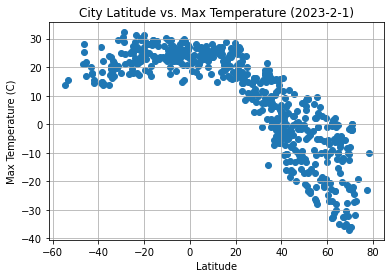

In [8]:
# Build scatter plot for latitude vs. temperature
x=city_data_df["Lat"]
y=city_data_df["Max Temp"]
plt.scatter(x,y)

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Max Temperature (2023-2-1)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

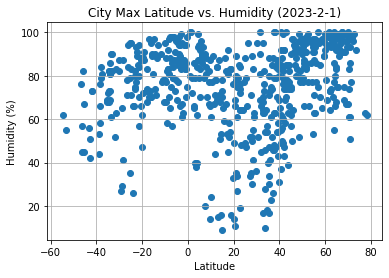

In [9]:
# Build the scatter plots for latitude vs. humidity
x=city_data_df["Lat"]
y=city_data_df["Humidity"]
plt.scatter(x,y)

# Incorporate the other graph properties
plt.grid()
plt.title("City Max Latitude vs. Humidity (2023-2-1)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

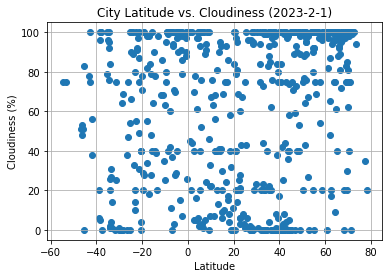

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x=city_data_df["Lat"]
y=city_data_df["Cloudiness"]
plt.scatter(x,y)

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Cloudiness (2023-2-1)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

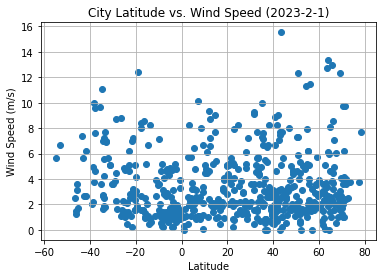

In [11]:
# Build the scatter plots for latitude vs. wind speed
x=city_data_df["Lat"]
y=city_data_df["Wind Speed"]
plt.scatter(x,y)

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Wind Speed (2023-2-1)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


## Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,okhotsk,59.3833,143.3000,-19.20,89,100,5.72,RU,1675297085
1,ibra,22.6906,58.5334,15.96,74,6,0.22,OM,1675297087
2,jamestown,42.0970,-79.2353,-5.23,74,0,3.09,US,1675297088
3,tobol,52.6844,62.5794,-23.29,99,27,1.64,KZ,1675297089
4,cherskiy,68.7500,161.3000,-21.40,99,100,1.91,RU,1675297090


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,sechura,-5.5569,-80.8222,24.56,73,28,4.32,PE,1675297093
8,mataura,-46.1927,168.8643,27.95,45,53,1.52,NZ,1675297094
9,busselton,-33.6500,115.3333,17.02,61,4,7.66,AU,1675297094
10,mar del plata,-38.0023,-57.5575,22.27,79,100,4.63,AR,1675297095
11,rikitea,-23.1203,-134.9692,26.51,75,10,6.21,PF,1675297097


###  Temperature vs. Latitude Linear Regression Plot

The r-square is -0.8536178312167783


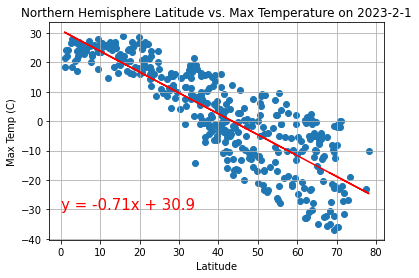

In [15]:
# Linear regression on Northern Hemisphere
#set values
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]

#label plot, set where equation appears
regEQplotX = 0
regEQplotY = -30

y_label=("Max Temp (C)")
plt.title("Northern Hemisphere Latitude vs. Max Temperature on 2023-2-1")

#run linear regression function
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save and show
plt.savefig("output_data/Fig5.png")
plt.show()

The r-square is 0.45372641328614854


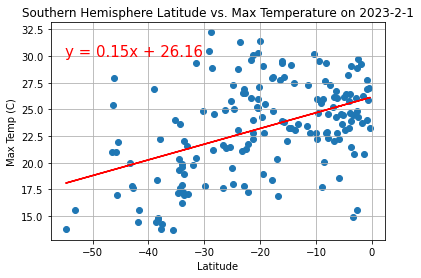

In [16]:
# Linear regression on Southern Hemisphere
#set values
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]

#label plot, set where equation appears
regEQplotX = -55
regEQplotY = 30

y_label=("Max Temp (C)")
plt.title("Southern Hemisphere Latitude vs. Max Temperature on 2023-2-1")

#run linear regression function
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save and show
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** 
- Results of the scatter plots reveal a strong negative correlation between latitude and temperature in the Northern hemispere on the date run (02/01/2023), during Northern hemispere winter, where r-square is -0.8575931500855868. The closer to the equator, the higher the temperature.

- Interestingly, the correlation between latitude and temperature in the Southern hemispere is much weaker on this date, during Southern hemisphere summer, where r-square is 0.34243324344306847.

### Humidity vs. Latitude Linear Regression Plot

The r-square is 0.34503366336034136


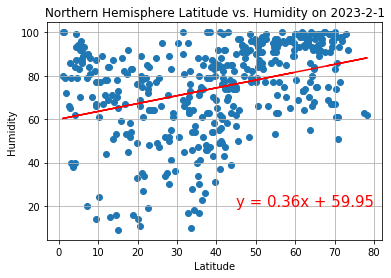

In [17]:
# Northern Hemisphere
#set values
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]

#label plot, set where equation appears
regEQplotX = 45
regEQplotY = 20

y_label=("Humidity")
plt.title("Northern Hemisphere Latitude vs. Humidity on 2023-2-1")

#run linear regression function
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save and show
plt.savefig("output_data/Fig7.png")
plt.show()

The r-square is 0.43661081228617177


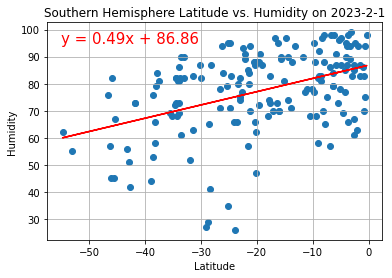

In [18]:
# Southern Hemisphere
#set values
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]

#label plot, set where equation appears
regEQplotX = -55
regEQplotY = 95

y_label=("Humidity")
plt.title("Southern Hemisphere Latitude vs. Humidity on 2023-2-1")

#run linear regression function
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save and show
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** 
- Results of the scatter plots reveal a weak correlation between latitude and humidity in the Northern hemispere on the date run (02/01/2023), during Northern hemispere winter, where r-square is 0.3962570492025764. 
- The Southern hemisphere showed a moderate correlation between latitude and humidity on this date in Southern hemisphere winter, with r-square value of 0.5169122161190883.

### Cloudiness vs. Latitude Linear Regression Plot

The r-square is 0.3147062774658713


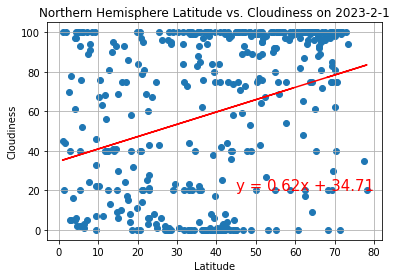

In [19]:
# Northern Hemisphere
#set values
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]

#label plot, set where equation appears
regEQplotX = 45
regEQplotY = 20

y_label=("Cloudiness")
plt.title("Northern Hemisphere Latitude vs. Cloudiness on 2023-2-1")

#run linear regression function
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save and show
plt.savefig("output_data/Fig9.png")
plt.show()

The r-square is 0.2910722219646059


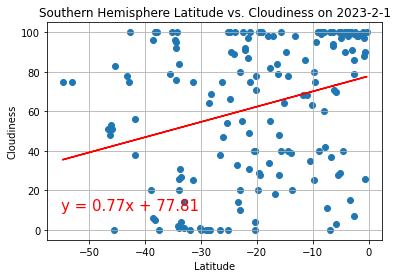

In [20]:
# Southern Hemisphere
#set values
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]

#label plot, set where equation appears
regEQplotX = -55
regEQplotY = 10

y_label=("Cloudiness")
plt.title("Southern Hemisphere Latitude vs. Cloudiness on 2023-2-1")

#run linear regression function
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save and show
plt.savefig("output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** 
- Results of the scatter plots reveal a weak correlation between latitude and cloudiness in the Northern hemispere on the date run (02/01/2023), during Northern hemispere winter, where r-square is 0.3252076230093149.
- The Southern hemisphere showed an even weaker, almost negligible correlation between latitude and cloudiness on this date in Southern hemisphere winter, with r-square value of 0.21761469982615173.

### Wind Speed vs. Latitude Linear Regression Plot

The r-square is 0.05292430265258557


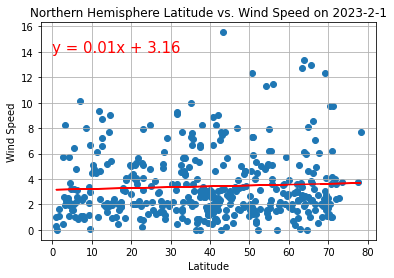

In [21]:
# Northern Hemisphere
#set values
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]

#label plot, set where equation appears
regEQplotX = 0
regEQplotY = 14

y_label=("Wind Speed")
plt.title("Northern Hemisphere Latitude vs. Wind Speed on 2023-2-1")

#run linear regression function
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save and show
plt.savefig("output_data/Fig11.png")
plt.show()

The r-square is -0.3710198422964261


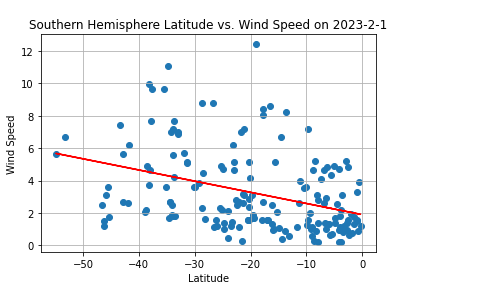

In [22]:
# Southern Hemisphere
#set values
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]

#label plot, set where equation appears
regEQplotX = 0
regEQplotY = 14

y_label=("Wind Speed")
plt.title("Southern Hemisphere Latitude vs. Wind Speed on 2023-2-1")

#run linear regression function
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save and show
plt.savefig("output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** 
- Results of the scatter plots reveal no correlation between latitude and wind speed in the Northern hemispere on the date run (02/01/2023), during Northern hemispere winter, where r-square is 0.068160099718988559.
- The Southern hemisphere showed a weak correlation between latitude and wind speed on this date in Southern hemisphere winter, with r-square value of -0.3050086426612116. Lower windspeeds were captured closer to the equator.